In [11]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
X=np.random.rand(100,1)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [37]:
X=X*2
y=4+3*X+np.random.randn(100,1)

Saving figure generated_data_plot


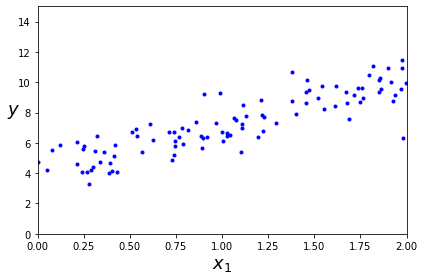

In [18]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [22]:
X_b=np.c_[np.ones((100,1)),X] # x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [23]:
theta_best 

array([[4.17676886],
       [2.96476667]])

We hoped that Q0= 4 and Q1=3, but we got Q1=4.17 and Q1= 2.96, but this is close enough

##### Now we can make predictions

In [24]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [26]:
X_new

array([[0],
       [2]])

In [29]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [30]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.17676886],
       [10.10630221]])

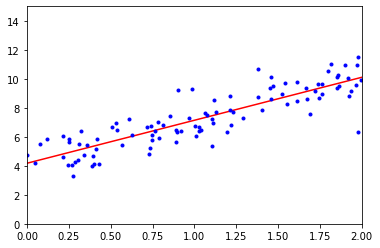

In [33]:
# Plotting models predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Saving figure linear_model_predictions_plot


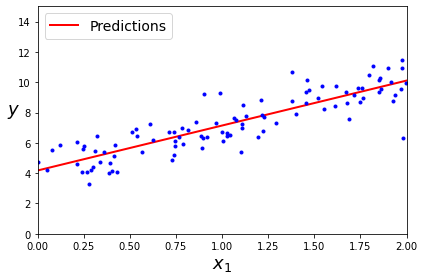

In [34]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # y=4.46+2.82+x1....

(array([4.46666675]), array([[2.82789558]]))

In [43]:
lin_reg.predict(X_new)

array([[ 4.46666675],
       [10.12245791]])

In [44]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.46666675],
       [5.65579116]])

In [45]:
np.linalg.pinv(X_b).dot(y)


array([[4.46666675],
       [5.65579116]])